In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("./glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


The data is taken from UCI Repository.

Attribute Information:

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Objective: To correctly classify/identify the glass type from the attributes given in the feature columns.

It is a multiclass classification problem.

The 7 glass types are as following:
    
    1 buildingwindowsfloatprocessed
    2 buildingwindowsnonfloatprocessed  
    3 vehiclewindowsfloatprocessed
    4 vehiclewindowsnonfloatprocessed (none in this database)
    5 containers
    6 tableware
    7 headlamps
    


# Data Analysis

1) Checking Missing or Null values


In [3]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

2) Checking data distribution

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.shape
#data size is small
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

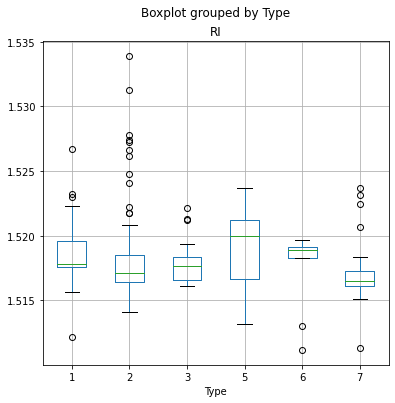

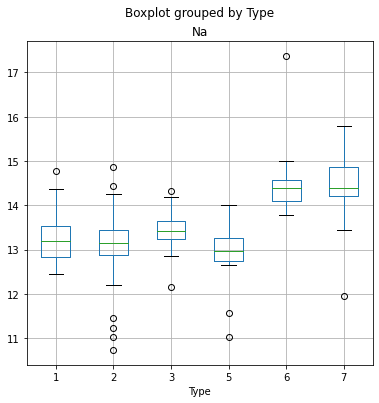

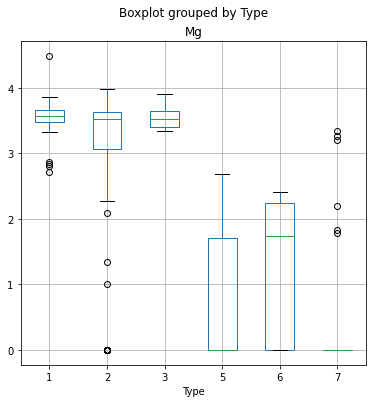

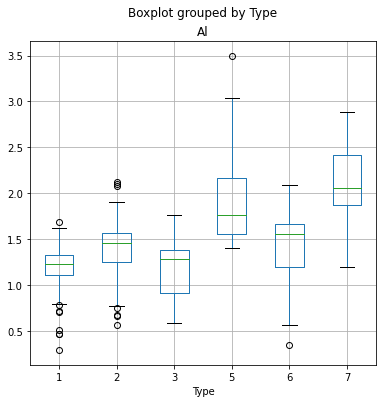

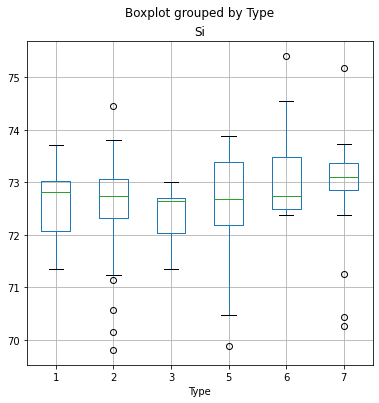

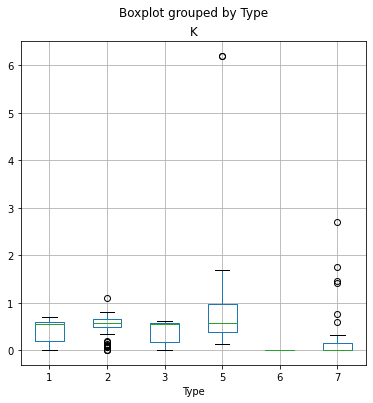

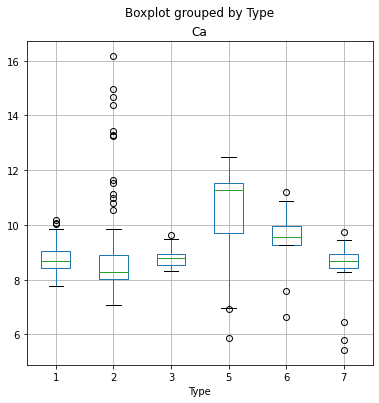

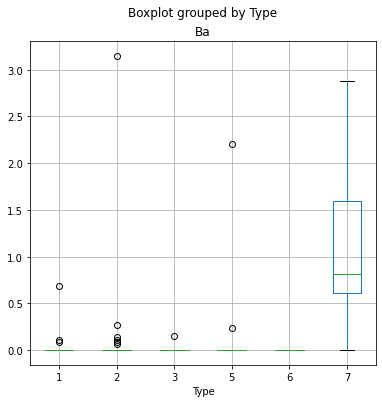

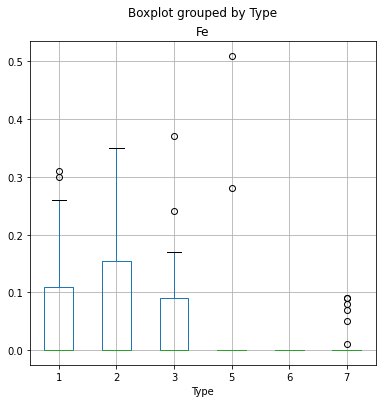

In [13]:

%matplotlib inline

features=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for col in features:
    data.boxplot(column=col, by= 'Type',figsize=(6,6))
    plt.title(col)
plt.show()

# Preparing the model (Basic)

In [14]:
label= 'Type'
X , y = data[features].values , data[label].values

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.3, random_state = 0, stratify = y)

In [68]:
from sklearn.linear_model import LogisticRegression
 
reg=0.01

lr=LogisticRegression(C = 1/reg ,solver='saga', multi_class= 'auto', max_iter= 800).fit(xtrain, ytrain)
ypred= lr.predict(xtest)

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [69]:
print('Predicted labels: ', ypred[:15])
print('Actual labels   : ' ,ytest[:15])

Predicted labels:  [1 2 1 1 2 1 2 2 2 7 2 2 2 7 1]
Actual labels   :  [2 3 2 1 2 1 1 2 5 7 1 2 5 5 1]


In [71]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        21
           2       0.68      0.65      0.67        23
           3       0.00      0.00      0.00         5
           5       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         3
           7       0.69      1.00      0.82         9

    accuracy                           0.66        65
   macro avg       0.42      0.46      0.43        65
weighted avg       0.58      0.66      0.61        65



In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(ytest, ypred))
print("Overall Precision:",precision_score(ytest, ypred, average='macro'))
print("Overall Recall:",recall_score(ytest, ypred, average='macro'))

Overall Accuracy: 0.6615384615384615
Overall Precision: 0.42346542346542343
Overall Recall: 0.4598861283643892


/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(ytest,ypred)

print(mcm)


[[15  4  2  0  0  0]
 [ 4 16  1  1  0  1]
 [ 4  1  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  1  0  0  1  1]
 [ 0  0  0  0  0  9]]


In [73]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

glass_prob = lr.predict_proba(xtest)
glass_types=['1','2','3','4','5','6','7']

fpr = {}
tpr = {}
thresh ={}

for i in range(len(glass_types)):
    fpr[i],tpr[i],thresh[i] = roc_curve(ytest, glass_prob[:,i], pos_label=i)

#plotting the roc_curve chart
# Plot the ROC ch

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


IndexError: index 6 is out of bounds for axis 1 with size 6

In [88]:
#plotting the roc_curve chart
# Plot the ROC chart
''''
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=glass_types[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=glass_types[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=glass_types[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label=glass_types[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='blue', label=glass_types[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label=glass_types[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='blue', label=glass_types[6] + ' vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()
'''

(65, 6)

Changing to other model: SVM OR RAINFOREST
AND PREPROCESSING IT TO SCALE VALUES

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers=[]

svm = SVC(probability=True)
classifiers.append(svm)

rf = RandomForestClassifier(n_estimators=100)
classifiers.append(rf)

knn = KNeighborsClassifier(n_neighbors=5)
classifiers.append(knn)

dt = DecisionTreeClassifier(max_features='auto')
classifiers.append(dt)

gbc = GradientBoostingClassifier(max_features= 'auto')
classifiers.append(gbc)

feat_cols = [1,2,3,4,5,6,7,8]
feature_transformer = Pipeline( steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers= [('preprocess', feature_transformer, feat_cols)])

for clf in classifiers:
    pipeline= Pipeline(steps=[ ('preprocessor', preprocessor), ('clf', clf) ])
    model=pipeline.fit(xtrain, ytrain)
    ympred= model.predict(xtest)
    print(clf)
    print("Overall Accuracy:",accuracy_score(ytest, ympred))
    print("Overall Precision:",precision_score(ytest, ympred, average='macro'))
    print("Overall Recall:",recall_score(ytest, ympred, average='macro'))
    print("\n")


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Overall Accuracy: 0.676923076923077
Overall Precision: 0.6568670792808724
Overall Recall: 0.5153554175293306




/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Overall Accuracy: 0.7846153846153846
Overall Precision: 0.7332539682539684
Overall Recall: 0.6259834368530021


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Overall Accuracy: 0.7076923076923077
Overall Precision: 0.6549002849002848
Overall Recall: 0.5523924545663677


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                      

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
#random forest gives the best results
#so using it for modeling
pipeline= Pipeline(steps=[ ('preprocessor', preprocessor), ('randomforest', RandomForestClassifier(n_estimators=100)) ])
model=pipeline.fit(xtrain, ytrain)
rfpred= model.predict(xtest)

In [127]:
#checking on random data for classification test
types=['build_windows','buildingwindowsnonfloatprocessed','vehiclewindowsfloatprocessed'
,'vehiclewindows'
,'containers'
,'tableware'
,'headlamps']
x_new=np.array([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0]])
pred = model.predict(x_new)[0]
print('Predicted class is', types[pred])

Predicted class is buildingwindowsnonfloatprocessed
